In [20]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import seaborn as sns

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()


df['data_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)



In [2]:
df_ind  = df[df['job_country'] == 'India']


In [3]:
df_skills = df_ind.explode('job_skills')


In [6]:
df_skills_count = df_skills.groupby(['job_skills'  , 'job_title_short']).size()
df_skills_count = df_skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by = 'skill_count' , ascending = False , inplace  = True)
df_skills_count

,job_skills,job_title_short,skill_count
1374,sql,Data Engineer,12993
1088,python,Data Engineer,11568
1089,python,Data Scientist,9248
1327,spark,Data Engineer,7157
103,aws,Data Engineer,6993
...,...,...,...
389,esquisse,Data Scientist,1
887,node.js,Senior Data Analyst,1
753,matlab,Cloud Engineer,1
411,fastapi,Cloud Engineer,1


In [11]:
job_titles = df_skills_count['job_title_short'].unique().tolist()

job_titles = sorted(job_titles[:3])

job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

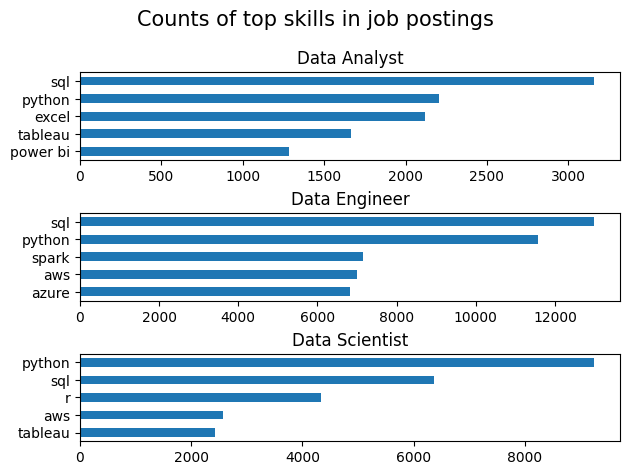

In [13]:
fig , ax = plt.subplots(len(job_titles) , 1)

for i , job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind = 'barh' , x = 'job_skills' , y = 'skill_count' , ax = ax[i] , title = job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)


fig.suptitle('Counts of top skills in job postings'  , fontsize = 15)
fig.tight_layout(h_pad=0.5)
plt.show()


In [14]:
df_job_title_count = df_ind['job_title_short'].value_counts().reset_index(name = 'jobs_total')

In [16]:
df_skills_perc = pd.merge(df_skills_count , df_job_title_count , how= 'left' , on = 'job_title_short')
df_skills_perc['skills_perc'] = 100 * df_skills_perc['skill_count']/df_skills_perc['jobs_total']
df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skills_perc
0,sql,Data Engineer,12993,19062,68.161788
1,python,Data Engineer,11568,19062,60.686182
2,python,Data Scientist,9248,13279,69.643798
3,spark,Data Engineer,7157,19062,37.545903
4,aws,Data Engineer,6993,19062,36.685552
...,...,...,...,...,...
1684,esquisse,Data Scientist,1,13279,0.007531
1685,node.js,Senior Data Analyst,1,1083,0.092336
1686,matlab,Cloud Engineer,1,351,0.284900
1687,fastapi,Cloud Engineer,1,351,0.284900


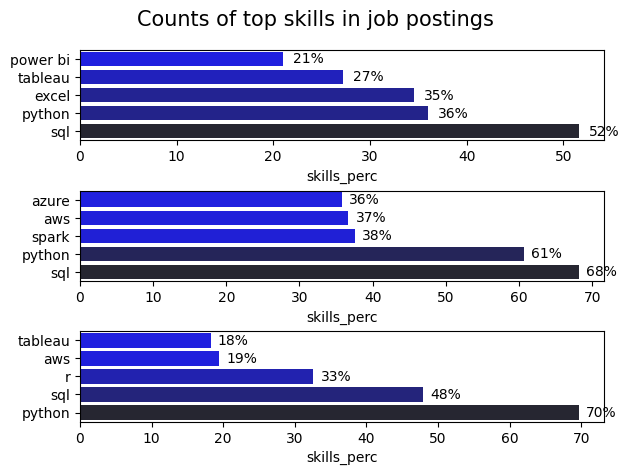

In [24]:
fig , ax = plt.subplots(len(job_titles) , 1)

for i , job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    # df_plot.plot(kind = 'barh' , x = 'job_skills' , y = 'skills_perc' , ax = ax[i] , title = job_title)
    sns.barplot(data = df_plot , x = 'skills_perc' , y = 'job_skills'  , ax = ax[i] , hue= 'skill_count' , palette = 'dark:b_r')
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)


    for n,v in enumerate(df_plot['skills_perc']):
        ax[i].text(v+1 , n, f'{v:.0f}%' , va = 'center')


fig.suptitle('Counts of top skills in job postings'  , fontsize = 15)
fig.tight_layout(h_pad=0.5)
plt.show()